# Simple Linear Regression

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [197]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


## Scatter Plot

Text(0, 0.5, 'Height')

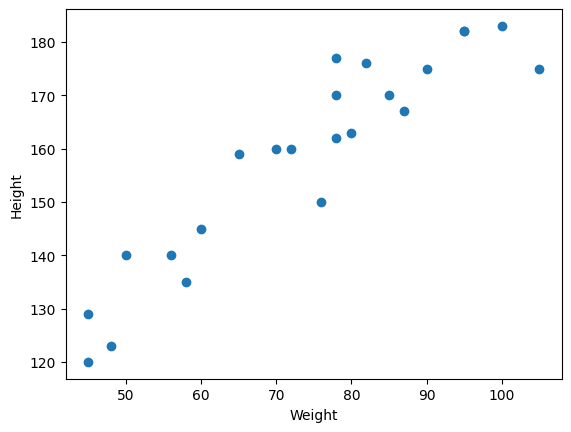

In [198]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [199]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


## Correlation visualisation

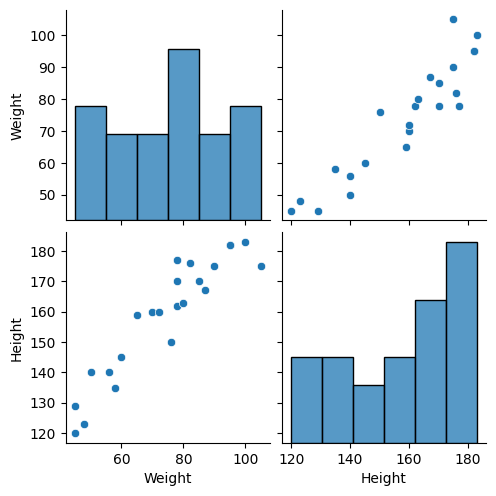

In [200]:
import seaborn as sns
sns.pairplot(df)

## Independent and dependent features

In [201]:
X_series = df["Weight"]
type(X_series) # Series
np.array(X_series) # converts to 1D array

array([ 45,  58,  48,  60,  70,  78,  80,  90,  95,  78,  82,  95, 105,
       100,  85,  78,  50,  65,  76,  87,  45,  56,  72])

In [202]:
X = df[['Weight']] ## Independent feature should be in a dataframe (not series) or 2d array
type(X) # DataFrame
np.array(X).shape # converts to 2D array

(23, 1)

In [203]:
y = df['Height'] ## As this is Linear Reg. there is only 1 o/p => it can be in series or 1D array

## Train-Test split

In [204]:
from sklearn.model_selection import train_test_split


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [206]:
X_train.shape

(17, 1)

## Standardization

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Mean and std. dev. calculated for this data and applied in Z score calculation/standardization

In [209]:
X_test = scaler.transform(X_test) # Uses the mean and std. dev. of X_train for standardization

## Apply Linear Regression

In [210]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

In [211]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [212]:
print("Coefficient: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient:  [17.2982057]
Intercept:  156.47058823529412


## Plot Best fit line

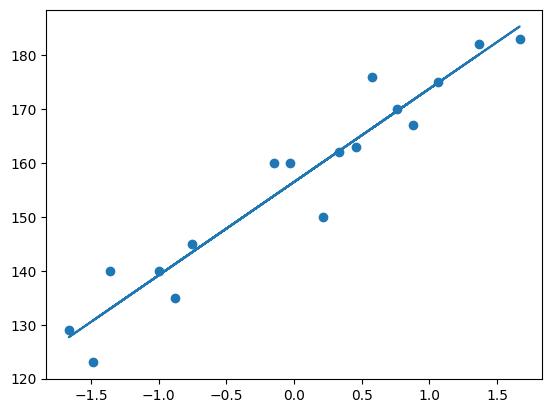

In [213]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

## Prediction for test data

1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 1.047 + 80.52(X_test)

In [214]:
y_pred = regression.predict(X_test)

## Performance Matrices

In [215]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [216]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R square Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [217]:
from sklearn.metrics import r2_score

In [218]:
score = r2_score(y_test,y_pred)
score

0.7360826717981276

In [219]:
## Prediction for a random Data Point
regression.predict(scaler.transform([[72]]))

/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])